In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [15]:
df = pd.read_csv('customer_experience_data.csv')

In [16]:
df.head()

,Customer_ID,Age,Gender,Location,Num_Interactions,Feedback_Score,Products_Purchased,Products_Viewed,Time_Spent_on_Site,Satisfaction_Score,Retention_Status,Gender_Encoded,Location_Encoded,Retention_Status_Encoded
0,1,56,Male,Urban,11,4,18,38,18.319606,7,Retained,1,2,1
1,2,69,Male,Suburban,10,3,2,17,9.015198,6,Retained,1,1,1
2,3,46,Male,Urban,5,5,11,46,45.921572,10,Churned,1,2,0
3,4,32,Female,Suburban,5,1,6,13,44.105053,5,Churned,0,1,0
4,5,60,Male,Urban,14,5,8,46,17.897471,1,Retained,1,2,1


In [17]:
df.shape

(1000, 14)

In [18]:
df.isnull().sum()

Customer_ID                 0
Age                         0
Gender                      0
Location                    0
Num_Interactions            0
Feedback_Score              0
Products_Purchased          0
Products_Viewed             0
Time_Spent_on_Site          0
Satisfaction_Score          0
Retention_Status            0
Gender_Encoded              0
Location_Encoded            0
Retention_Status_Encoded    0
dtype: int64

In [19]:
df.duplicated().sum()

0

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               1000 non-null   int64  
 1   Age                       1000 non-null   int64  
 2   Gender                    1000 non-null   object 
 3   Location                  1000 non-null   object 
 4   Num_Interactions          1000 non-null   int64  
 5   Feedback_Score            1000 non-null   int64  
 6   Products_Purchased        1000 non-null   int64  
 7   Products_Viewed           1000 non-null   int64  
 8   Time_Spent_on_Site        1000 non-null   float64
 9   Satisfaction_Score        1000 non-null   int64  
 10  Retention_Status          1000 non-null   object 
 11  Gender_Encoded            1000 non-null   int64  
 12  Location_Encoded          1000 non-null   int64  
 13  Retention_Status_Encoded  1000 non-null   int64  
dtypes: float6

In [21]:
df.describe()

,Customer_ID,Age,Num_Interactions,Feedback_Score,Products_Purchased,Products_Viewed,Time_Spent_on_Site,Satisfaction_Score,Gender_Encoded,Location_Encoded,Retention_Status_Encoded
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,500.500000,43.81900,7.545000,2.985000,10.417000,27.370000,32.274399,5.540000,0.524000,1.032000,0.69400
std,288.819436,14.99103,4.016978,1.418022,5.345623,12.939572,15.734978,2.904279,0.499674,0.809711,0.46106
min,1.000000,18.00000,1.000000,1.000000,1.000000,5.000000,5.114208,1.000000,0.000000,0.000000,0.00000
25%,250.750000,31.00000,4.000000,2.000000,6.000000,17.000000,18.836771,3.000000,0.000000,0.000000,0.00000
50%,500.500000,44.00000,8.000000,3.000000,11.000000,27.500000,32.455598,6.000000,1.000000,1.000000,1.00000
75%,750.250000,56.00000,11.000000,4.000000,15.000000,38.000000,45.932524,8.000000,1.000000,2.000000,1.00000
max,1000.000000,69.00000,14.000000,5.000000,19.000000,49.000000,59.947722,10.000000,1.000000,2.000000,1.00000


In [22]:
df.columns

Index(['Customer_ID', 'Age', 'Gender', 'Location', 'Num_Interactions',
       'Feedback_Score', 'Products_Purchased', 'Products_Viewed',
       'Time_Spent_on_Site', 'Satisfaction_Score', 'Retention_Status',
       'Gender_Encoded', 'Location_Encoded', 'Retention_Status_Encoded'],
      dtype='object')

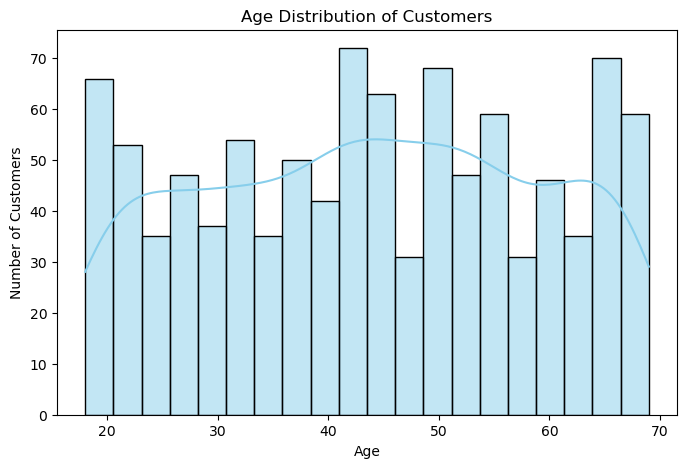

In [23]:
# Distribution of Customer Age
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()


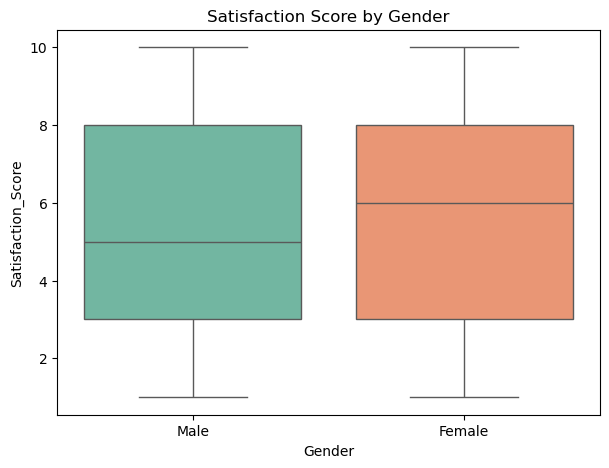

In [24]:
# Gender-wise Satisfaction Score
plt.figure(figsize=(7, 5))
sns.boxplot(x='Gender', y='Satisfaction_Score', data=df, palette='Set2')
plt.title('Satisfaction Score by Gender')
plt.show()


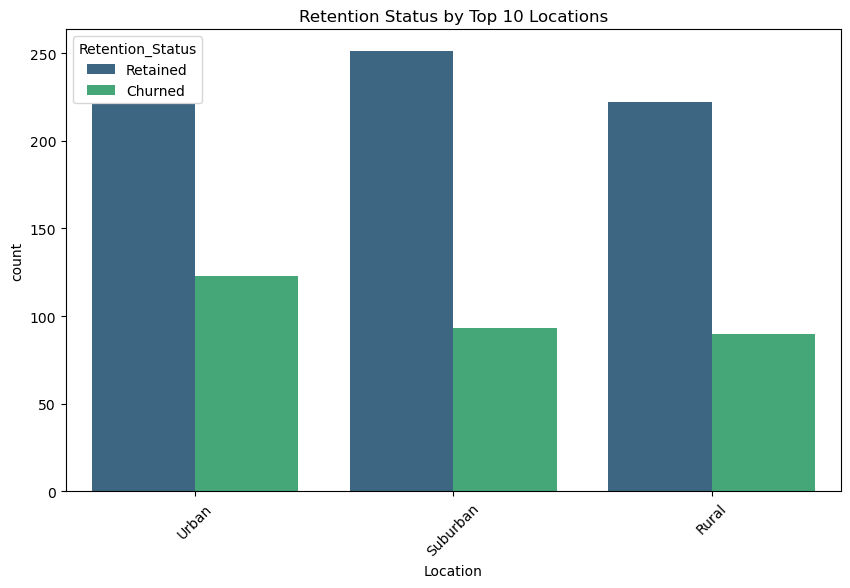

In [25]:
# Top Locations by Retention
top_locations = df['Location'].value_counts().nlargest(10).index
plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['Location'].isin(top_locations)],
              x='Location', hue='Retention_Status', palette='viridis')
plt.title('Retention Status by Top 10 Locations')
plt.xticks(rotation=45)
plt.show()


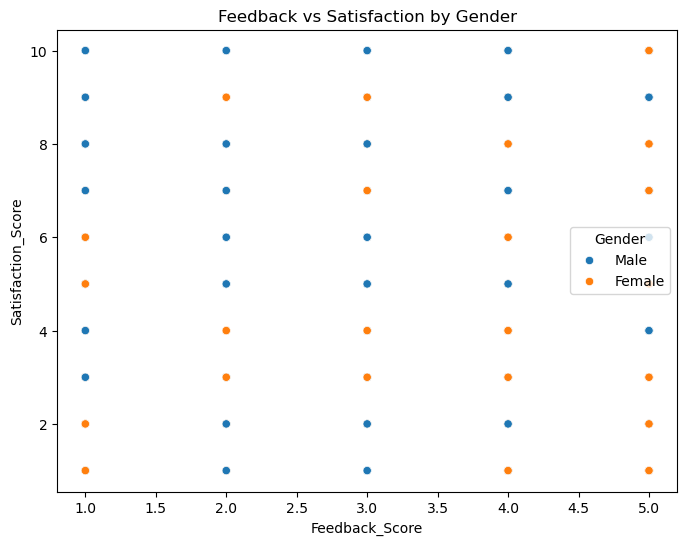

In [26]:
# Feedback Score vs Satisfaction Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Feedback_Score', y='Satisfaction_Score', hue='Gender', data=df)
plt.title('Feedback vs Satisfaction by Gender')
plt.show()


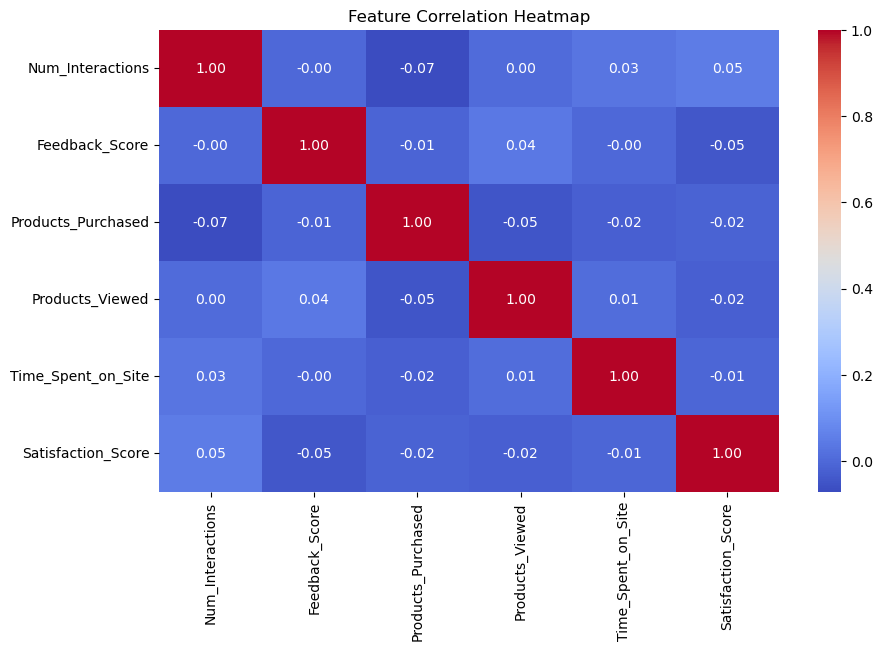

In [27]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
corr = df[['Num_Interactions', 'Feedback_Score', 'Products_Purchased',
           'Products_Viewed', 'Time_Spent_on_Site', 'Satisfaction_Score']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()


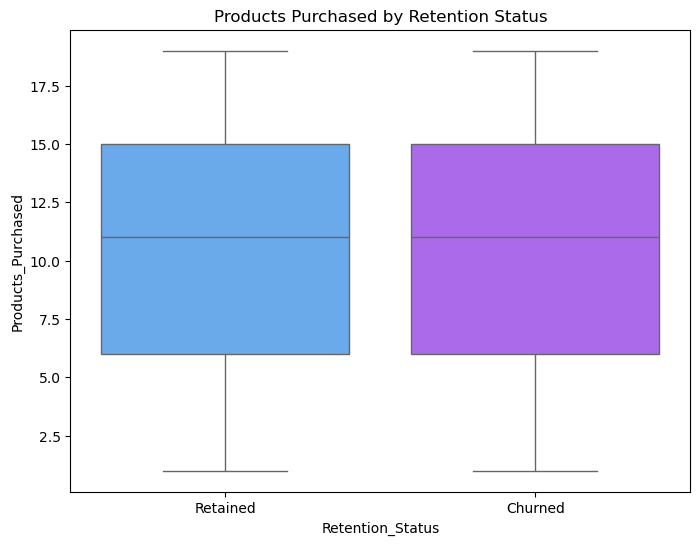

In [28]:
# Products Purchased vs. Satisfaction
plt.figure(figsize=(8, 6))
sns.boxplot(x='Retention_Status', y='Products_Purchased', data=df, palette='cool')
plt.title('Products Purchased by Retention Status')
plt.show()


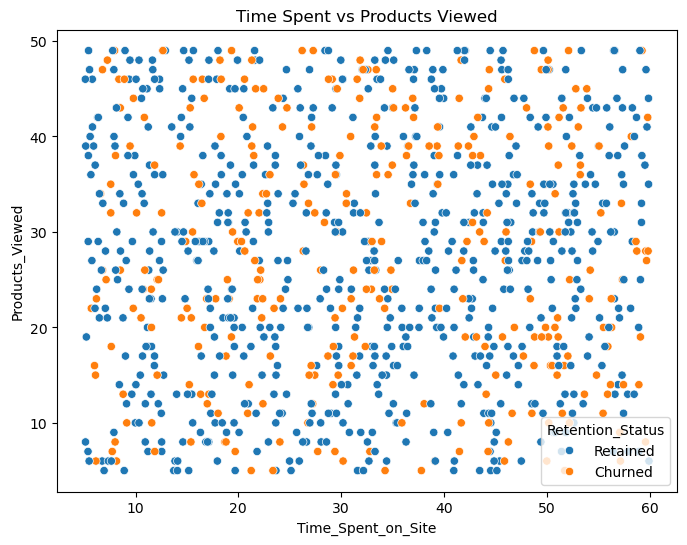

In [29]:
# Time Spent vs Products Viewed
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Time_Spent_on_Site', y='Products_Viewed', hue='Retention_Status', data=df)
plt.title('Time Spent vs Products Viewed')
plt.show()


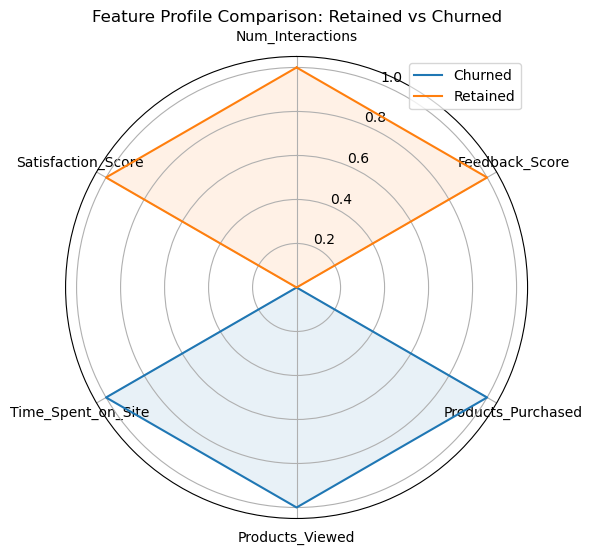

In [32]:
# Radar Chart: Feature Profile of Retained vs Churned Customers
features = ['Num_Interactions', 'Feedback_Score', 'Products_Purchased','Products_Viewed', 'Time_Spent_on_Site', 'Satisfaction_Score']

grouped = df.groupby('Retention_Status')[features].mean()

# Normalize
grouped_norm = (grouped - grouped.min()) / (grouped.max() - grouped.min())

# Radar chart
labels = features
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
labels += labels[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
for idx, row in grouped_norm.iterrows():
    values = row.tolist()
    values += values[:1]
    ax.plot(angles, values, label=idx)
    ax.fill(angles, values, alpha=0.1)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels[:-1])
plt.title('Feature Profile Comparison: Retained vs Churned')
plt.legend()
plt.show()
